# CrunchBase Data Analysis
This data set contains information about company founding rounds from May through October 2018 (six months). The data points out that the month when these events happens the most in the United States is May. This is also true for San Francisco, California.
Source: https://www.crunchbase.com/?utm_source=google&utm_term=%20company%20%20data&utm_content=ETA&utm_medium=cpc&utm_campaign=SG-CORE-PRIMARY

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from cycler import cycler
import seaborn as sns
%matplotlib inline

In [2]:
import sys
sys.maxsize

2147483647

In [3]:
data=pd.read_csv('src/Data/crunchbase_clean_2018.csv')
data.head()

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
0,0,0,0,TechyBoltz.com,"Founded in 2017, TechyBoltz.com is the first T...",TechyBoltz is India's Fastest Growing and awar...,"'News', 'Information Technology'","'Content and Publishing', 'Media and Entertain...",techyboltz-com,2018-10-30,...,1000000.0,0.0,0,0,0,0,0,bb2e504528754eab9e1038abf9d2e731,2018,10
1,The Netherlands,Noord-Holland,Amsterdam,By Rocket Box,By Rocket Box is a startup that creates Welcom...,Coming Soon,0,0,rocket-box-group,2018-10-28,...,0.0,1.0,0,0,0,0,0,007229b41a197ce1f42bc0e481a85861,2018,10
2,Belgium,West-Vlaanderen,Oostkamp,Wetime,Wetime is a social platform that engages coupl...,Wetime is the bridge builder for couples and f...,"'Social Network', 'Dating', 'B2C', 'Communitie...","'Internet Services', 'Community and Lifestyle'...",wetime,2018-10-20,...,0.0,0.0,0,0,0,0,0,ebe752d1cc32497faf208f52e82a208d,2018,10
3,Kenya,Nairobi Area,Nairobi,ImpalaCoin,We are Building a trade finance Crypto bank o...,Digital Currency Kenya,0,0,impalacoin,2018-10-20,...,0.0,0.0,0,0,0,0,0,c9994563a56e4b9fb3204f1a0b5db7c3,2018,10
4,United States,Massachusetts,Cambridge,MTonomy,Future of digital media: \r\n\r\n- Scalable de...,"Blockchain infrastructure to license, distribu...","'Blockchain', 'Media and Entertainment', 'Inte...","'Media and Entertainment', 'Internet Services'",mtonomy,2018-10-20,...,0.0,1.0,0,0,0,0,0,7d89c23af1a04235870605141a0d751e,2018,10


In [5]:
data.count()

location_country_code          11265
location_region                11265
location_city                  11265
fundedorg_name                 11265
fundedorg_description          11265
fundedorg_short_description    11265
fundedorg_categories           11265
fundedorg_category_groups      11265
fundedorg_permalink            11265
announced_on                   11265
funding_type                   11265
series                         11265
money_raised_usd               11265
n_investors                    11265
investor_name                  11265
investor_type                  11265
investor_investor_type         11265
investor_description           11265
investor_short_description     11265
uuid                           11265
Year                           11265
Month                          11265
dtype: int64

In [6]:
data= data.fillna('0')

In [7]:
#Changing the dtypes of the date 
data['announced_on']=pd.to_datetime(data['announced_on'],format='%Y-%m-%d')

In [8]:
data['Year'] = data['announced_on'].dt.year
data['Month'] = data['announced_on'].dt.month

In [9]:
data

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
0,0,0,0,TechyBoltz.com,"Founded in 2017, TechyBoltz.com is the first T...",TechyBoltz is India's Fastest Growing and awar...,"'News', 'Information Technology'","'Content and Publishing', 'Media and Entertain...",techyboltz-com,2018-10-30,...,1000000.0,0.0,0,0,0,0,0,bb2e504528754eab9e1038abf9d2e731,2018,10
1,The Netherlands,Noord-Holland,Amsterdam,By Rocket Box,By Rocket Box is a startup that creates Welcom...,Coming Soon,0,0,rocket-box-group,2018-10-28,...,0.0,1.0,0,0,0,0,0,007229b41a197ce1f42bc0e481a85861,2018,10
2,Belgium,West-Vlaanderen,Oostkamp,Wetime,Wetime is a social platform that engages coupl...,Wetime is the bridge builder for couples and f...,"'Social Network', 'Dating', 'B2C', 'Communitie...","'Internet Services', 'Community and Lifestyle'...",wetime,2018-10-20,...,0.0,0.0,0,0,0,0,0,ebe752d1cc32497faf208f52e82a208d,2018,10
3,Kenya,Nairobi Area,Nairobi,ImpalaCoin,We are Building a trade finance Crypto bank o...,Digital Currency Kenya,0,0,impalacoin,2018-10-20,...,0.0,0.0,0,0,0,0,0,c9994563a56e4b9fb3204f1a0b5db7c3,2018,10
4,United States,Massachusetts,Cambridge,MTonomy,Future of digital media: \r\n\r\n- Scalable de...,"Blockchain infrastructure to license, distribu...","'Blockchain', 'Media and Entertainment', 'Inte...","'Media and Entertainment', 'Internet Services'",mtonomy,2018-10-20,...,0.0,1.0,0,0,0,0,0,7d89c23af1a04235870605141a0d751e,2018,10
5,United States,Pennsylvania,Philadelphia,Simply Good Jars,0,Eat well | Feel Good | Waste Less,'Organic Food','Food and Beverage',simply-good-jars,2018-10-20,...,350000.0,2.0,Investor's Circle,Organization,angel_group,"Investors' Circle is the oldest, largest and m...","Investors' Circle is the oldest, largest and m...",19e3767d62d34c6487c72901dfcb2780,2018,10
6,United States,Colorado,Denver,Sustain,0,Sustain rewards and incentivize employees to c...,0,0,sustain-2,2018-10-18,...,0.0,0.0,0,0,0,0,0,1db16dc217ea481d9d6101f32fa49660,2018,10
7,Japan,Tokyo,Tokyo,Meltin MMI,Meltin MMI is a cyborg-technology company that...,Meltin MMI is a cyborg-technology company that...,"'Robotics', 'Health Care', 'Biotechnology'","'Hardware', 'Science and Engineering', 'Softwa...",meltin-mmi,2018-10-17,...,17974941.0,3.0,Dainippon Sumitomo Pharma,Organization,0,"""Green Prism"", the symbol of Dainippon Sumitom...",Dainippon Sumitomo Pharma is a pharmaceutical ...,f0877e36d40c4d628c35c6769cec12e3,2018,10
8,Israel,HaMerkaz,Rehovot,Cognata,The fast lane to Autonomous Driving.\r\n\r\nAu...,Cognata provides driving validation platform f...,"'Autonomous Vehicles', 'Automotive', 'Software'","'Transportation', 'Transportation', 'Software'",cognata,2018-10-17,...,18500000.0,5.0,Scale Venture Partners,Organization,venture_capital,Scale Venture Partners invests in software com...,Scale Venture Partners is a VC firm funding th...,ee565296d58944eaaf23c7342100041b,2018,10
9,Indonesia,Jakarta Raya,Jakarta,Crowde,Crowde is a crowd-investing platform that enab...,Crowde is a crowd-investing platform that enab...,"'AgTech', 'Social Entrepreneurship', 'Crowdfun...","'Agriculture and Farming', 'Community and Life...",crowde,2018-10-17,...,0.0,2.0,GREE Ventures,Organization,venture_capital,GREE Ventures focuses on investing in early st...,GREE Ventures invests in early stage (Seed to ...,e8c430e2b8d7453c9f2708d27b4efcab,2018,10


In [10]:
#Exploration of number of funding rounds by category 
data.groupby('fundedorg_category_groups')['fundedorg_name'].nunique().sort_values(ascending=False).head(20)

fundedorg_category_groups
0                                                                           1127
'Health Care'                                                                299
'Financial Services'                                                         192
'Health Care', 'Health Care', 'Health Care'                                  188
'Health Care', 'Health Care'                                                 146
'Commerce and Shopping'                                                      137
'Education'                                                                  131
'Software'                                                                   121
'Health Care', 'Health Care', 'Biotechnology', 'Science and Engineering'     105
'Information Technology'                                                      97
'Transportation'                                                              96
'Biotechnology', 'Science and Engineering'                                    92
'M

In [11]:
#Exploration of number of funding rounds by location
data.groupby('location_city')['fundedorg_name'].nunique().sort_values(ascending=False).head(20)

location_city
0                656
Beijing          565
San Francisco    484
New York         476
London           428
Shanghai         306
Shenzhen         202
Hangzhou         142
Singapore        132
Cambridge        116
Boston           102
Chicago          101
Los Angeles      101
Seattle           98
Stockholm         98
Austin            97
Paris             95
Mumbai            89
Palo Alto         86
Guangzhou         80
Name: fundedorg_name, dtype: int64

In [12]:
data['money_raised_usd'] = data['money_raised_usd'].astype(float)
data.sort_values('money_raised_usd',ascending=False).head(10)

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
7954,China,Zhejiang,Hangzhou,Ant Financial,Ant Financial Services Group is an online paym...,Ant Financial is an online payment services pr...,"'FinTech', 'Banking', 'Wealth Management', 'Pa...","'Financial Services', 'Financial Services', 'L...",alipay,2018-06-08,...,1.400000e+10,7.0,GIC,Organization,private_equity_firm,"Through informed and calculated investing, we ...","Through informed and calculated investing, we ...",b827338698454af99bcfe114fe4d2787,2018,6
1675,Saudi Arabia,Ar Riyad,Riyadh,Saudi Arabia's Public Investment Fund,The Public Investment Fund was originally esta...,The Public Investment Fund (PIF) facilitates t...,0,0,saudi-arabia-s-public-investment-fund,2018-09-17,...,1.100000e+10,3.0,0,0,0,0,0,b5b112b293774bceb000f24021a1f753,2018,9
8517,India,Maharashtra,Mumbai,IndiaFirst Life Insurance,IndiaFirst Life Insurance is one of India’s yo...,An Insurance Company.,"'Banking', 'Insurance', 'Financial Services'","'Financial Services', 'Lending and Investments...",indiafirst-life-insurance,2018-06-01,...,7.100000e+09,1.0,Warburg Pincus,Organization,private_equity_firm,Warburg Pincus LLC is a leading global private...,Warburg Pincus LLC is a global private equity ...,d37095dc5649478d89b5f65c3d004bd1,2018,6
9832,South Africa,NA - South Africa,Durban,Aspen Pharmacare,Aspen is a supplier of branded and generic pha...,Aspen Pharmacare is a global supplier of brand...,"'Pharmaceutical', 'Medical Device'","'Health Care', 'Health Care'",aspen-pharmacare,2018-05-17,...,4.008432e+09,0.0,0,0,0,0,0,041dbccfd57849648123b5c0dc66c0da,2018,5
8972,Cayman Islands,Midland,George Town,Block.one,Block.one is an open source software publisher...,block.one provides end-to-end solutions to bri...,"'Blockchain', 'Infrastructure', 'Software', 'I...","'Software', 'Internet Services'",block-one,2018-05-30,...,4.000000e+09,1.0,0,0,0,0,0,535271a6d4304027aae43aed2f483523,2018,5
3382,Canada,Ontario,Smiths Falls,Canopy Growth,Canopy Growth is publicly traded on the TSX an...,Canopy Growth is a diversified producer of med...,"'Cannabis', 'Pharmaceutical', 'Health Care', '...","'Community and Lifestyle', 'Food and Beverage'...",canopy-growth,2018-08-15,...,3.803019e+09,1.0,Constellation Brands Canada,Organization,0,Constellation Brands Canada is the producer an...,Constellation Brands Canada is the producer an...,4a1137641f6b43ff910ab4a8f536596e,2018,8
3424,0,0,0,FS/KKR Advisor,0,FS/KKR Advisor is a investment adviser which i...,"'Real Estate Investment', 'Financial Services'","'Financial Services', 'Real Estate', 'Financia...",fs-kkr-advisor,2018-08-14,...,3.400000e+09,4.0,0,0,0,0,0,cc82a110f2ee4d9d8e515c89f476e606,2018,8
8871,United States,California,San Francisco,Cruise Automation,"Cruise, a subsidiary of General Motors, is a d...",Cruise Automation is a self-driving car compan...,"'Autonomous Vehicles', 'Sensor', 'Robotics', '...","'Transportation', 'Hardware', 'Hardware', 'Sci...",cruise,2018-05-31,...,3.350000e+09,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",2c392063c23b4af6a0b719a9f4c94999,2018,5
2898,China,Shanghai,Putuo,ELEME,ELEME operates as an online ordering platform....,ELEME develops a platform that offers online f...,"'Delivery Service', 'Service Industry', 'Food ...","'Transportation', 'Food and Beverage', 'Transp...",ele-me,2018-08-23,...,3.000000e+09,2.0,Alibaba Group,Organization,0,Alibaba Group operate leading online and mobil...,Alibaba Group aims to build the future infrast...,417af9aae3274db89b2460c7e959bd8f,2018,8
4602,South Africa,NA - South Africa,Sandown,Eskom Holdings,Eskom generates a

In [13]:
data.to_csv('crunchbase_clean_2018.csv',index=False) 

In [46]:
list(data)

['location_country_code',
 'location_region',
 'location_city',
 'fundedorg_name',
 'fundedorg_description',
 'fundedorg_short_description',
 'fundedorg_categories',
 'fundedorg_category_groups',
 'fundedorg_permalink',
 'announced_on',
 'funding_type',
 'series',
 'money_raised_usd',
 'n_investors',
 'investor_name',
 'investor_type',
 'investor_investor_type',
 'investor_description',
 'investor_short_description',
 'uuid',
 'Year',
 'Month']

In [50]:
data['money_raised_usd']

0          1000000.0
1                0.0
2                0.0
3                0.0
4                0.0
5           350000.0
6                0.0
7         17974941.0
8         18500000.0
9                0.0
10        35000000.0
11         2312499.0
12         3000000.0
13               0.0
14          872163.0
15               0.0
16         4800000.0
17               0.0
18         3000000.0
19         6053012.0
20         2659374.0
21               0.0
22               0.0
23        21000000.0
24               0.0
25               0.0
26         9000000.0
27         5203124.0
28               0.0
29         5000000.0
            ...     
11235            0.0
11236            0.0
11237            0.0
11238            0.0
11239            0.0
11240      1649239.0
11241       325925.0
11242      4000000.0
11243            0.0
11244       250000.0
11245            0.0
11246            0.0
11247            0.0
11248       250000.0
11249            0.0
11250            0.0
11251      15

In [48]:
data1= data.drop(columns=[ 'money_raised_usd','funding_type','Month'])
data1.to_csv("moneypertype.csv", index=False)

In [14]:
df_world= data[data['fundedorg_categories'].str.contains('Autonomous Vehicles')] 
df_world.shape

(73, 22)

In [15]:
df_world = df_world[df_world.location_country_code != 'United States']
df_world

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
8,Israel,HaMerkaz,Rehovot,Cognata,The fast lane to Autonomous Driving.\r\n\r\nAu...,Cognata provides driving validation platform f...,"'Autonomous Vehicles', 'Automotive', 'Software'","'Transportation', 'Transportation', 'Software'",cognata,2018-10-17,...,18500000.0,5.0,Scale Venture Partners,Organization,venture_capital,Scale Venture Partners invests in software com...,Scale Venture Partners is a VC firm funding th...,ee565296d58944eaaf23c7342100041b,2018,10
50,Brazil,Goias,Israelândia,VAYAVISION,0,Leading raw data fusion and perception system ...,"'Autonomous Vehicles', 'Search Engine', 'Autom...","'Transportation', 'Internet Services', 'Transp...",vayavision,2018-10-16,...,8000000.0,5.0,MizMaa Ventures,Organization,venture_capital,MizMaa Ventures is a principal investment firm...,MizMaa is working with the deep technology inn...,dfc25980c0c44ed09c64743548039304,2018,10
408,United Kingdom,Oxfordshire,Banbury,First Line,0,First Line is an internationally renowned dist...,"'Autonomous Vehicles', 'Automotive'","'Transportation', 'Transportation'",first-line-ltd,2018-10-09,...,26313538.0,1.0,Santander Corporate & Commercial,Organization,investment_bank,Whether small family companies or global corpo...,Whether small family companies or global corpo...,bf738a7212664f738c86f5e7d60e0a8e,2018,10
992,Germany,Berlin,Berlin,Teraki,Teraki's software solution works as an enabler...,Teraki offers AI software that enables automot...,"'Autonomous Vehicles', 'Automotive', 'B2B', 'I...","'Transportation', 'Transportation', 'Internet ...",teraki,2018-09-27,...,3000000.0,2.0,0,0,0,0,0,743c348e708f499ba2fce19a4906252f,2018,9
1202,India,Karnataka,Bangalore,Bounce (Metro Bikes),Bounce (formerly Metro Bikes) is an urban mobi...,Bounce (formerly Metro Bikes) is an urban mobi...,"'Last Mile Transportation', 'Autonomous Vehicl...","'Transportation', 'Transportation', 'Transport...",metro-bikes,2018-09-25,...,3000000.0,1.0,InnoVen Capital,Organization,"corporate_venture_capital,venture_debt",InnoVen Capital is Asia's leading venture lend...,"InnoVen Capital, backed by Temasek and UOB Gro...",2c27ead8f7554e7e8ceee7384fa33753,2018,9
1530,United Kingdom,Oxfordshire,Oxford,Oxbotica Ltd,Oxbotica is developing the next generation of ...,Oxbotica is developing the next generation of ...,"'Autonomous Vehicles', 'Artificial Intelligenc...","'Transportation', 'Artificial Intelligence', '...",oxbotica-ltd,2018-09-19,...,18397885.0,0.0,0,0,0,0,0,2e34d7624f0d48a09b65246e05e4de05,2018,9
1704,France,Midi-Pyrenees,Toulouse,EasyMile,EasyMile is a high-tech startup specialized in...,EasyMile is a high-tech startup specialized in...,"'Autonomous Vehicles', 'Electric Vehicle', 'Ro...","'Transportation', 'Transportation', 'Hardware'...",easymile,2018-09-17,...,7562175.0,1.0,Bpifrance,Organization,"government_office,investment_bank","Bpifrance assists companies, booting up the li...",Bpifrance provides financial solutions for com...,667fa5da29ec44ebad17428237697964,2018,9
1783,China,Shanghai,Shanghai,Banma Network Technologies,Banma Network Technologies is an Internet car ...,Banma Network Technologies is an Internet car ...,"'Autonomous Vehicles', 'Automotive', 'Internet'","'Transportation', 'Transportation', 'Internet ...",banma-network-technologies,2018-09-13,...,233000000.0,3.0,SDIC Fund Management,Organization,0,0,SDIC Fund Management,ff0589fd65614870a7b5b4c5cb0d2831,2018,9
1812,Germany,Bayern,München,Blickfeld,Blickfeld develop and sell LiDAR sensors and p...,Blickfeld develop and sell LiDAR sensors and p...,"'Autonomous Vehicles', 'Sensor', 'Software'","'Transportation', 'Hardware', 'Software'",blickfeld,2018-09-13,...,5700000.0

In [16]:
df_world.to_csv('Automative_World_data.csv',index=False)  

In [17]:
#Comparing cities in the United States by funding raised in different industries 
United_States_data= data[data['location_country_code'].isin(['United States'])]
United_States_data.shape

(4682, 22)

In [18]:
United_States_data = United_States_data.reindex()
United_States_data['money_raised_usd'] = United_States_data['money_raised_usd'].astype(float)

In [19]:
United_States_data.sort_values('money_raised_usd',ascending=False).head(10)

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
8871,United States,California,San Francisco,Cruise Automation,"Cruise, a subsidiary of General Motors, is a d...",Cruise Automation is a self-driving car compan...,"'Autonomous Vehicles', 'Sensor', 'Robotics', '...","'Transportation', 'Hardware', 'Hardware', 'Sci...",cruise,2018-05-31,...,3.350000e+09,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",2c392063c23b4af6a0b719a9f4c94999,2018,5
3871,United States,California,Palo Alto,Tesla,Tesla Motors was started by a group of Silicon...,Tesla Motors accelerates the transition to ele...,"'Automotive', 'Electronics', 'Innovation Manag...","'Transportation', 'Consumer Electronics', 'Har...",tesla-motors,2018-08-07,...,2.000000e+09,0.0,0,0,0,0,0,4cd7dedcac3d43cea24ba3214bfbeecf,2018,8
9402,United States,Virginia,Sandston,Steinhoff Africa Retail,The separation of Steinhoff’s emerging and dev...,Steinhoff’s emerging and developed market reta...,"'Consumer', 'Retail Technology', 'Retail'","'Commerce and Shopping', 'Hardware', 'Software...",steinhoff-africa-retail,2018-05-23,...,1.444786e+09,0.0,0,0,0,0,0,66de4c879b9e43099eae1c4971199082,2018,5
7328,United States,Pennsylvania,Horsham,Workspace Property Trust,"Workspace Property Trust is a privately held, ...",Workspace Property Trust is a real estate comp...,'Real Estate','Real Estate',workspace-property-trust,2018-06-18,...,1.275000e+09,1.0,JP Morgan Chase & Co.,Organization,investment_bank,"JPMorgan Chase & Co., a financial holding comp...",JP Morgan Chase & Co. is a global financial se...,cf936930f8494d9aa00767cc406ca59f,2018,6
3646,United States,New York,New York,WeWork,WeWork is a platform for creators that transfo...,WeWork is a platform for creators that transfo...,"'Property Development', 'Hospitality', 'Commer...","'Real Estate', 'Travel and Tourism', 'Real Est...",wework,2018-08-09,...,1.000000e+09,1.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",bf4007e60715472cb74f1f996a4570b4,2018,8
3839,United States,California,Los Angeles,NewTV,NewTV is a media company developing short-form...,NewTV is a media company developing short-form...,"'TV', 'Media and Entertainment', 'TV Production'","'Media and Entertainment', 'Video', 'Media and...",newtv,2018-08-07,...,1.000000e+09,11.0,Madrone Capital Partners,Organization,family_investment_office,Not much is known on the internet about Madron...,Private equity firm associated with Rob Walton...,9cb76b4963634bc592f986c99b8d3801,2018,8
7383,United States,Nevada,Las Vegas,MGM Resorts International,"MGM Resorts International develops, builds and...",MGM Resorts International is a hospitality fir...,"'Hospitality', 'Resorts'","'Travel and Tourism', 'Travel and Tourism'",mgm-resorts-international,2018-06-18,...,1.000000e+09,0.0,0,0,0,0,0,2993c0f7d22a4269b3b7d9f4e622b7cc,2018,6
1665,United States,California,Menlo Park,Lucid Motors,Lucid Motors sets out to create a car that ele...,Lucid Motors is a Silicon Valley company that ...,"'Electric Vehicle', 'Automotive', 'Software'","'Transportation', 'Transportation', 'Software'",atieva,2018-09-17,...,1.000000e+09,1.0,Saudi Arabia's Public Investment Fund,Organization,"government_office,venture_capital",The Public Investment Fund was originally esta...,The Public Investment Fund (PIF) facilitates t...,d0951485dcfa4f65929d1baa32ca7e36,2018,9
6370,United States,California,Burbank,Legendary Entertainment,"Legendary Entertainment offers film, televisio...","Legendary Entertainment offers film, televisio...","'TV', 'Media and Entertainm

In [20]:
United_States_data.investor_type.value_counts()

0               2315
Organization    2282
Person            85
Name: investor_type, dtype: int64

In [21]:
United_States_data.Month.value_counts()

5     1117
6     1092
7      812
8      671
9      630
10     360
Name: Month, dtype: int64

In [22]:
United_States_data.fundedorg_name.value_counts().head(20)

Rutgers University                        6
The University of Texas at San Antonio    4
Optimus Technologies                      4
ONEDOME                                   3
MadlyRad Labs, Inc.                       3
Bungalow                                  3
FREY                                      3
Hitch                                     3
FiscalNote                                3
Clinicai                                  3
Clinical Ink                              3
Chowly, Inc.                              3
LaunchPad Medical                         3
SMBX                                      3
Oasis Labs                                3
PetPlate                                  3
Azitra                                    3
BlueVine                                  3
dotin Inc.                                3
Offerpad                                  2
Name: fundedorg_name, dtype: int64

In [23]:
United_States_data.Year.value_counts()

2018    4682
Name: Year, dtype: int64

In [24]:
#Trends in the number of investors involved
United_States_data.investor_name.value_counts().head(20)

0                                2391
National Institutes of Health      34
Quake Capital Partners             22
National Science Foundation        18
Insight Venture Partners           17
GV                                 16
Y Combinator                       16
New Enterprise Associates          13
Andreessen Horowitz                12
Goldman Sachs                      11
Kleiner Perkins                     9
Lightspeed Venture Partners         9
Temasek Holdings                    8
Founders Fund                       8
General Catalyst                    8
U.S. Department of Defense          8
Sequoia Capital                     8
Accel                               8
T. Rowe Price                       7
Foundry Group                       7
Name: investor_name, dtype: int64

In [25]:
#Average money raised per funding round across different locations and/or categories, 
United_States_data.groupby('location_city').money_raised_usd.mean().sort_values(ascending=False).head(10)

location_city
Sandston            1.444786e+09
Horsham             1.275000e+09
Braintree           7.000000e+08
Kennesaw            6.000000e+08
Leawood             6.000000e+08
Plainsboro          3.500000e+08
Chevy Chase         3.500000e+08
Burbank             3.333900e+08
Maryland Heights    2.660000e+08
Needham             2.573060e+08
Name: money_raised_usd, dtype: float64

In [26]:
United_States_data.groupby('fundedorg_name').money_raised_usd.mean().sort_values(ascending=False).head(10)

fundedorg_name
Cruise Automation              3.350000e+09
Tesla                          2.000000e+09
Steinhoff Africa Retail        1.444786e+09
Workspace Property Trust       1.275000e+09
Legendary Entertainment        1.000000e+09
MGM Resorts International      1.000000e+09
Lucid Motors                   1.000000e+09
NewTV                          1.000000e+09
Parametric Technology (PTC)    1.000000e+09
WeWork                         1.000000e+09
Name: money_raised_usd, dtype: float64

In [27]:
United_States_data.groupby('location_region').money_raised_usd.mean().sort_values(ascending=False).head(10)

location_region
Kansas           6.728000e+07
Nevada           5.855425e+07
Utah             5.488862e+07
Georgia          3.142237e+07
Tennessee        3.041402e+07
Missouri         2.939675e+07
Maryland         2.883153e+07
California       2.768312e+07
Massachusetts    2.760364e+07
Virginia         2.349793e+07
Name: money_raised_usd, dtype: float64

In [28]:
United_States_data.groupby('fundedorg_categories').money_raised_usd.mean().sort_values(ascending=False).head(10)

fundedorg_categories
'Autonomous Vehicles', 'Sensor', 'Robotics', 'Transportation', 'Automotive'                                                                                              3.350000e+09
'Automotive', 'Electronics', 'Innovation Management'                                                                                                                     2.000000e+09
'Hospitality', 'Resorts'                                                                                                                                                 1.000000e+09
'TV', 'Media and Entertainment', 'Film Production', 'Content Delivery Network', 'Film'                                                                                   1.000000e+09
'TV', 'Media and Entertainment', 'TV Production'                                                                                                                         1.000000e+09
'Electric Vehicle', 'Automotive', 'Software'                         

In [29]:
United_States_data.fundedorg_categories[11226]

"'Autonomous Vehicles', 'Simulation', '3D Technology'"

In [30]:
df= United_States_data[United_States_data['fundedorg_categories'].str.contains('Autonomous Vehicles')] 
df

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
401,United States,Massachusetts,Somerville,Perceptive Automata,Perceptive Automata is solving what is often d...,Human Intuition for Machines,"'Autonomous Vehicles', 'Artificial Intelligenc...","'Transportation', 'Artificial Intelligence', '...",perceptive-automata,2018-10-09,...,1.600000e+07,5.0,Jazz Venture Partners,Organization,venture_capital,JAZZ Venture Partners is the leading venture c...,JAZZ Venture Partners is the leading venture c...,d032a2666c06430ea72a1a194291338f,2018,10
817,United States,California,Palo Alto,Aeva,Aeva develops a new sensing & perception parad...,Aeva develops a new sensing & perception parad...,"'Autonomous Vehicles', 'Navigation', 'Automotive'","'Transportation', 'Navigation and Mapping', 'T...",aeva,2018-10-01,...,4.500000e+07,2.0,Lux Capital,Organization,venture_capital,Lux Capital Management is a research-driven in...,VC based in NYC and Menlo Park investing in co...,96680e1a83c94a2e8e61df349d8b931e,2018,10
1484,United States,California,Palo Alto,Cabture,"\r\nAcross the globe, transportation companies...",Cabture dramatically improves profitability of...,"'Smart Cities', 'Autonomous Vehicles', 'Media ...","'Real Estate', 'Transportation', 'Media and En...",cabture,2018-09-19,...,9.000000e+04,0.0,0,0,0,0,0,ababcd91ad944d1b97af33e15ac252ca,2018,9
2774,United States,California,San Jose,AutoX,AutoX is defining the future of Location Based...,AutoX is bring Location Based Services with ca...,"'Autonomous Vehicles', 'Artificial Intelligenc...","'Transportation', 'Artificial Intelligence', '...",autox-ac12,2018-08-27,...,4.300000e+07,0.0,0,0,0,0,0,3438ec7e2a964ff7984151d1cb376bbf,2018,8
2868,United States,New York,Brooklyn,CARMERA,CARMERA provides real-time 3D maps and navigat...,CARMERA provides real-time HD maps and navigat...,"'Autonomous Vehicles', 'Mapping Services', 'Bi...","'Transportation', 'Navigation and Mapping', 'D...",carmera,2018-08-23,...,2.000000e+07,1.0,GV,Organization,"corporate_venture_capital,venture_capital","Launched as Google Ventures in 2009, GV is the...","GV provides seed, venture, and growth stage fu...",ad8786ac550e43cc83a9bd9a5a8ba984,2018,8
3341,United States,California,Palo Alto,Cabture,"\r\nAcross the globe, transportation companies...",Cabture dramatically improves profitability of...,"'Smart Cities', 'Autonomous Vehicles', 'Media ...","'Real Estate', 'Transportation', 'Media and En...",cabture,2018-08-15,...,1.540000e+05,0.0,0,0,0,0,0,b8277dc0c3114e60afe5841d729b0373,2018,8
3358,United States,California,Mountain View,Ghost Locomotion,Ghost Locomotion is an automotive company that...,Ghost Locomotion is an automotive company that...,"'Autonomous Vehicles', 'Automotive'","'Transportation', 'Transportation'",ghost-locomotion,2018-08-15,...,1.500000e+07,3.0,0,0,0,0,0,76feaab013a84ea9b7935eba54be15f0,2018,8
3484,United States,California,Palo Alto,DeepMap,DeepMap is solving the HD mapping & localizati...,Our unique service turns your self-driving fle...,"'Autonomous Vehicles', 'Computer', 'Software'","'Transportation', 'Consumer Electronics', 'Har...",deepmap,2018-08-14,...,0.000000e+00,1.0,Robert Bosch Venture Capital,Organization,corporate_venture_capital,"RBVC invests in seed, early-, and late-stage V...",RBVC invests in start-up companies either dire...,11665e4e16b84afd8df7cc8467934378,2018,8
3832,United States,California,San Francisco,Scale API,Scale accelerates the development of AI applic...,Scale is an API for training data that provide...,"'Autonomous Vehicles', 'Task Management', 'Dev...","'Transportation', 'Software', 'Software', 'Art...",scale-2,2018-08-07,...,1.800000e+07,5.0,Index Ventures,Organization,venture_capital

In [31]:
df.to_csv('Automative_US_data.csv',index=False)

In [32]:
#Lets take a look at San Francisco
San_Francisco_data=United_States_data[United_States_data['location_city'].isin(['San Francisco'])]

In [33]:
San_Francisco_data.fundedorg_name.nunique()

484

In [34]:
San_Francisco_data.sort_values('money_raised_usd',ascending=False).head(10)

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
8871,United States,California,San Francisco,Cruise Automation,"Cruise, a subsidiary of General Motors, is a d...",Cruise Automation is a self-driving car compan...,"'Autonomous Vehicles', 'Sensor', 'Robotics', '...","'Transportation', 'Hardware', 'Hardware', 'Sci...",cruise,2018-05-31,...,3.350000e+09,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",2c392063c23b4af6a0b719a9f4c94999,2018,5
5741,United States,California,San Francisco,JUUL,JUUL is an electronics company that specialize...,JUUL is an electronics company that specialize...,"'Consumer Goods', 'Consumer Electronics', 'Lei...","'Consumer Goods', 'Consumer Electronics', 'Har...",juul,2018-07-10,...,6.500000e+08,1.0,Tiger Global Management,Organization,0,"Tiger Global Management, LLC is an investment ...","Tiger Global Management, LLC is an investment ...",3ca182abac4245fd878871c7af75b9ae,2018,7
6470,United States,California,San Francisco,Lyft,Lyft is a fast growing ridesharing company in ...,"Lyft designs, markets, and operates a mobile a...","'Peer to Peer', 'Mobile Apps', 'Ride Sharing',...","'Apps', 'Mobile', 'Software', 'Transportation'...",lyft,2018-06-28,...,6.000000e+08,2.0,Fidelity Management and Research Company,Organization,private_equity_firm,0,Fidelity Management & Research Company is a pr...,d9ed8ce02ddd4e8bb5179aebf0184c21,2018,6
9399,United States,California,San Francisco,Uber,"Uber develops, markets, and operates a ridesha...","Uber develops, markets, and operates a ridesha...","'Mobile Apps', 'Ride Sharing', 'Transportation...","'Apps', 'Mobile', 'Software', 'Transportation'...",uber,2018-05-23,...,6.000000e+08,3.0,0,0,0,0,0,6dae3de6bded4eaeaf37ad588ab0eee9,2018,5
94,United States,California,San Francisco,Instacart,Instacart is a grocery delivery startup that d...,Instacart delivers groceries and home essentia...,"'Delivery Service', 'Grocery', 'Same Day Deliv...","'Transportation', 'Food and Beverage', 'Transp...",instacart,2018-10-16,...,6.000000e+08,1.0,D1 Capital Partners,Organization,0,0,D1 Capital Partners is an investment firm.,494d246c8dee44d698fed1918508f50b,2018,10
2748,United States,California,San Francisco,Uber,"Uber develops, markets, and operates a ridesha...","Uber develops, markets, and operates a ridesha...","'Mobile Apps', 'Ride Sharing', 'Transportation...","'Apps', 'Mobile', 'Software', 'Transportation'...",uber,2018-08-27,...,5.000000e+08,1.0,Toyota Motor Corporation,Organization,0,Toyota is a company that is operating its busi...,Toyota is a Japanese automotive company that m...,be7136e2486e4ad2a909b7da62e6c029,2018,8
3018,United States,California,San Francisco,Slack,Slack is the leading global collaboration hub ...,Slack is an enterprise software platform that ...,"'Real Time', 'Messaging', 'Collaboration', 'Sa...","'Information Technology', 'Internet Services',...",slack,2018-08-21,...,4.270000e+08,6.0,Dragoneer Investment Group,Organization,"private_equity_firm,venture_capital","Dragoneer is a long-only, growth-oriented publ...","Dragoneer is a long-only, growth-oriented publ...",68d1ccf209d44cb2971317cac920fefe,2018,8
1023,United States,California,San Francisco,Opendoor,Opendoor makes it possible to receive an offer...,Opendoor offers an online home-selling service...,"'Property Management', 'Internet', 'Real Estate'","'Real Estate', 'Internet Services', 'Real Estate'",opendoor-2,2018-09-27,...,4.000000e+08,1.0,Softbank Vision Fund,Organization,0,"SoftBank Vision Fund, a subsidiary of SoftBank...","SoftBank Vision Fund, a subsidiary of SoftBank...",03245067a1a14d5dad9c878bfeadc7cc,2018,9
7594,U

In [35]:
San_Francisco_data.groupby('fundedorg_categories').money_raised_usd.mean().sort_values(ascending=False)

fundedorg_categories
'Autonomous Vehicles', 'Sensor', 'Robotics', 'Transportation', 'Automotive'                                                                                                                      3.350000e+09
'Consumer Goods', 'Consumer Electronics', 'Leisure', 'Lifestyle'                                                                                                                                 6.500000e+08
'Delivery Service', 'Grocery', 'Same Day Delivery', 'Delivery', 'E-Commerce'                                                                                                                     6.000000e+08
'Mobile Apps', 'Ride Sharing', 'Transportation', 'Customer Service', 'Public Transportation'                                                                                                     5.500000e+08
'Real Time', 'Messaging', 'Collaboration', 'SaaS', 'Enterprise Software'                                                                                   

In [36]:
San_Francisco_data.groupby('investor_name').money_raised_usd.mean().sort_values(ascending=False).head(10)

investor_name
SoftBank                                    1.296667e+09
Fidelity Management and Research Company    6.000000e+08
D1 Capital Partners                         6.000000e+08
Toyota Motor Corporation                    5.000000e+08
Dragoneer Investment Group                  4.270000e+08
Softbank Vision Fund                        4.000000e+08
Tiger Global Management                     3.125000e+08
PSP Investments                             2.500000e+08
DST Global                                  2.500000e+08
General Atlantic                            1.875000e+08
Name: money_raised_usd, dtype: float64

In [37]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.family': 'sans-serif',
    'font.sans-serif' : 'Tahoma',
    'axes.facecolor' : '#ffffff',
    'axes.axisbelow':True, 
    'axes.grid' : True,
    'grid.color' : '#bec0c2',
    'grid.linestyle' : 'dotted',
    'axes.spines.left'   : False,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right' : False,
    'axes.prop_cycle': cycler('color', ['chartreuse','mediumseagreen','mediumaquamarine','mediumturquoise','cadetblue','skyblue','teal',
                                        'mediumspringgreen','seagreen']),
    'xtick.bottom'  : False,
    'ytick.left': False,
    'figure.titlesize' : 'large', 
    'figure.titleweight' : 'bold',
    'figure.facecolor' : '#ffffff',
    'text.color' : '#595959',
    'axes.labelcolor' : '#595959',
    'xtick.color' : '#595959',
    'ytick.color' : '#595959',
    'legend.loc' : 'best',
    'legend.fancybox'    : True,
    'legend.frameon'     : True,
    'legend.edgecolor'     : '0.9',
    'legend.markerscale'   : '0.5',
    'lines.marker'      : None,
    'lines.markersize'  : 3,           
})

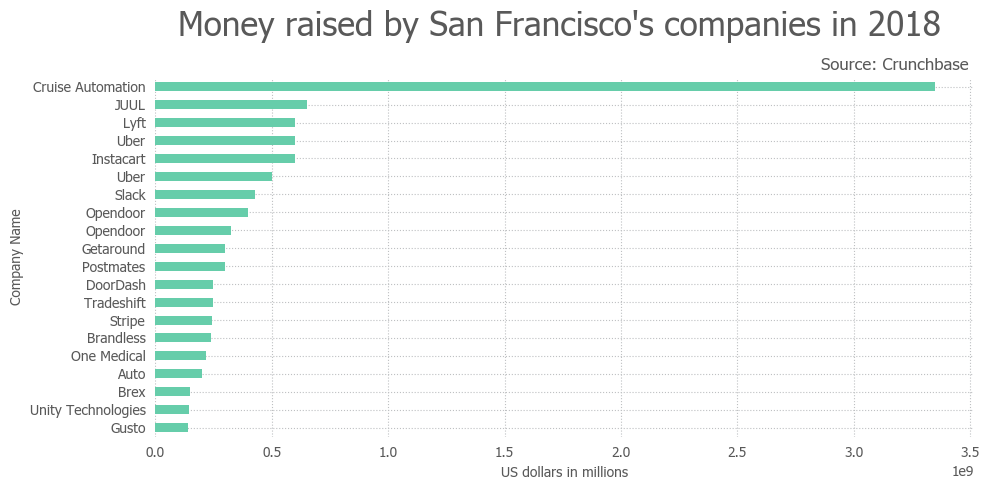

In [38]:
df1= San_Francisco_data.sort_values(by='money_raised_usd',ascending=False).head(20)
ax= df1.plot(kind='barh', x='fundedorg_name', y='money_raised_usd', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Money raised by San Francisco's companies in 2018 ", pad=30, fontsize=24)
ax.set_xlabel('US dollars in millions')
ax.set_ylabel('Company Name')
plt.gcf().text(0.9, 0.85, "Source: Crunchbase", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

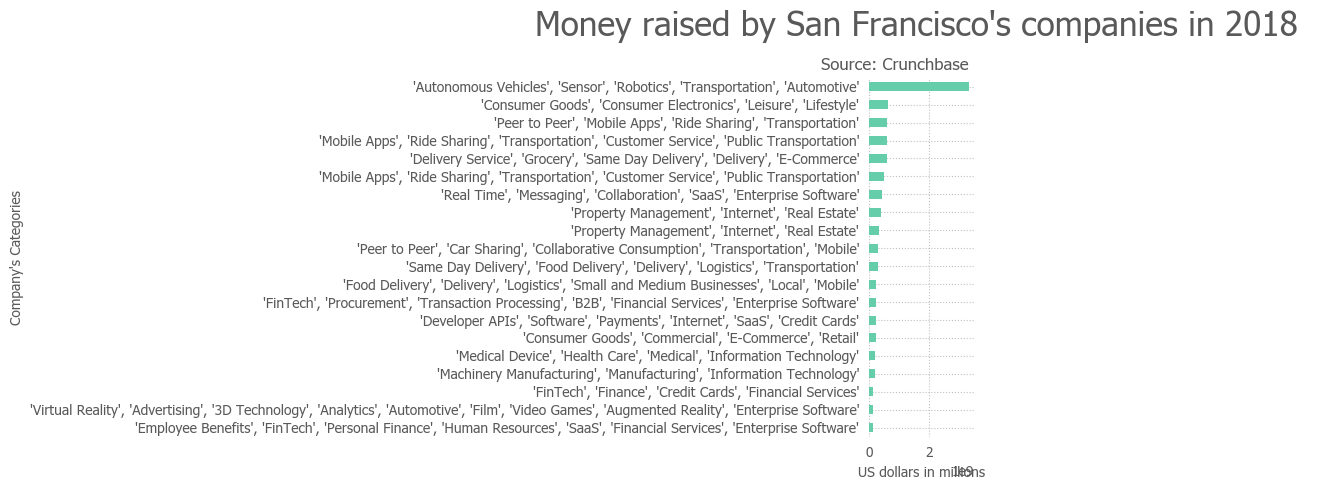

In [39]:
df1= San_Francisco_data.sort_values(by='money_raised_usd',ascending=False).head(20)
ax= df1.plot(kind='barh', x='fundedorg_categories', y='money_raised_usd', figsize=(10,5),legend=False,rot=0,color='mediumaquamarine')
ax.set_title("Money raised by San Francisco's companies in 2018 ", pad=30, fontsize=24)
ax.set_xlabel('US dollars in millions')
ax.set_ylabel("Company's Categories")
plt.gcf().text(0.9, 0.85, "Source: Crunchbase", ha='center', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [40]:
San_Francisco_data.to_csv('data.csv',index=False)

In [41]:
United_States_data[United_States_data.investor_name == 'U.S. Department of Defense']

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
382,United States,Minnesota,Rochester,Mayo Clinic,"Mayo Clinic, a not-for-profit medical group pr...",MayoClinic a nonprofit medical practice and me...,"'Non Profit', 'Health Care', 'Biotechnology', ...","'Health Care', 'Biotechnology', 'Science and E...",mayoclinic,2018-10-10,...,11000000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,11d0de203ef64fa0b87c20ce48fc26d5,2018,10
668,United States,Ohio,Cleveland,SPR Therapeutics,SPRÂ® Therapeutics is a medical device company...,SPR Therapeutics develops peripheral nerve sti...,"'Therapeutics', 'Health Care', 'Medical', 'Har...","'Health Care', 'Health Care', 'Health Care', '...",spr-therapeutics,2018-10-03,...,10000000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,a8b60d564530447c8f171f59224646bf,2018,10
1802,United States,Connecticut,Farmington,Azitra,Azitra is a biotech startup working to bring m...,Azitra is a biotech startup working to bring m...,"'Consumer Goods', 'Alternative Medicine', 'Hea...","'Consumer Goods', 'Health Care', 'Health Care'",azitra,2018-09-13,...,500000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,cbd3f9fd78ba4944afe2897eb17ea0e0,2018,9
1909,United States,Massachusetts,Boston,Alivio Therapeutics,Alivio Therapeutics is pioneering targeted dis...,Alivio Therapeutics is pioneering a new way to...,0,0,alivio-therapeutics,2018-09-12,...,3300000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,49070eda2b7c477d9f77c79a97677128,2018,9
6516,United States,Massachusetts,Chestnut Hill,Platelet BioGenesis,Platelet BioGenesis is a Harvard University sp...,Platelets stop you from bleeding. Our bioreact...,"'Life Science', 'Ediscovery', 'Biotechnology'","'Biotechnology', 'Science and Engineering', 'I...",platelet-biogenesis,2018-06-28,...,3500000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,7c13e13dd5424df0a950a119efc1b7c9,2018,6
8932,United States,Massachusetts,Woburn,Frequency Therapeutics,Frequency Therapeutics develops small molecule...,Frequency Therapeutics develops small molecule...,"'Genetics', 'Biotechnology', 'Medical'","'Biotechnology', 'Health Care', 'Biotechnology...",frequency-therapeutics,2018-05-30,...,2000000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,a4f4b99583e84b599135ecb2e210bd27,2018,5
10294,United States,Ohio,Cleveland,Cleveland Clinic,Cleveland Clinic is a non-profit academic medi...,Cleveland Clinic is a non-profit academic medi...,"'Hospital', 'Non Profit', 'Health Care'","'Health Care', 'Health Care'",cleveland-clinic,2018-05-10,...,2500000.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. Department of Defense is America's oldest...,U.S. Department of Defense Provides the Milita...,d7d9c1dab6dc4c6e99b2c6824254e084,2018,5
10916,United States,California,Los Angeles,Keck School of Medicine,Keck School of Medicine's mission is to improv...,Keck School of Medicine is a school.,0,0,keck-school-of-medicine,2018-05-03,...,564656.0,1.0,U.S. Department of Defense,Organization,government_office,U.S. De

In [42]:
United_States_data[United_States_data.investor_name == 'SoftBank']

,location_country_code,location_region,location_city,fundedorg_name,fundedorg_description,fundedorg_short_description,fundedorg_categories,fundedorg_category_groups,fundedorg_permalink,announced_on,...,money_raised_usd,n_investors,investor_name,investor_type,investor_investor_type,investor_description,investor_short_description,uuid,Year,Month
757,United States,New York,New York,HEED,HEED is a new consumer platform that is transf...,HEED is a new consumer platform that transform...,"'Media and Entertainment', 'Sports', 'Internet'","'Media and Entertainment', 'Sports', 'Internet...",heed,2018-10-02,...,3.500000e+07,1.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",39f26017dfe242eb811d947b16f8812d,2018,10
3041,United States,California,San Francisco,Getaround,Getaround empowers users to instantly rent and...,Getaround is a mobile application and a peer-t...,"'Peer to Peer', 'Car Sharing', 'Collaborative ...","'Transportation', 'Transportation', 'Mobile'",getaround,2018-08-21,...,3.000000e+08,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",24a53583f0bb43ff912ea3b39ca820da,2018,8
3646,United States,New York,New York,WeWork,WeWork is a platform for creators that transfo...,WeWork is a platform for creators that transfo...,"'Property Development', 'Hospitality', 'Commer...","'Real Estate', 'Travel and Tourism', 'Real Est...",wework,2018-08-09,...,1.000000e+09,1.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",bf4007e60715472cb74f1f996a4570b4,2018,8
4262,United States,California,San Francisco,Brandless,"Based in San Francisco, Brandless is a fresh a...",Brandless is an e-commerce company providing u...,"'Consumer Goods', 'Commercial', 'E-Commerce', ...","'Consumer Goods', 'Commerce and Shopping', 'Co...",brandless,2018-07-31,...,2.400000e+08,5.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",f01f8276c86049b7875cb910dc5eb453,2018,7
5095,United States,California,Palo Alto,Light,Light is focused on revolutionizing photograph...,Light combines revolutionary optics technology...,"'Photography', 'Consumer Electronics', 'Softwa...","'Content and Publishing', 'Media and Entertain...",light,2018-07-18,...,1.210000e+08,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",d5e3b23006c14396b8ad3cf9f495001f,2018,7
8871,United States,California,San Francisco,Cruise Automation,"Cruise, a subsidiary of General Motors, is a d...",Cruise Automation is a self-driving car compan...,"'Autonomous Vehicles', 'Sensor', 'Robotics', '...","'Transportation', 'Hardware', 'Hardware', 'Sci...",cruise,2018-05-31,...,3.350000e+09,2.0,SoftBank,Organization,investment_bank,SoftBank is a multinational telecommunications...,"SoftBank provides fixed line, mobile telephony...",2c392063c23b4af6a0b719a9f4c94999,2018,5


In [43]:
California_data= United_States_data[United_States_data.location_region == 'California']

In [36]:
California_data.money_raised_usd.sum()

42604328872.0